In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing,model_selection

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Admission_Predict.csv')

In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df['TOEFL Score'].max()

120

In [10]:
df.loc[df['GRE Score']==340]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,26,340,120,5,4.5,4.5,9.60,1,0.94
33,34,340,114,5,4.0,4.0,9.60,1,0.90
81,82,340,120,4,5.0,5.0,9.50,1,0.96
84,85,340,115,5,4.5,4.5,9.45,1,0.94
143,144,340,120,4,4.5,4.0,9.92,1,0.97
202,203,340,120,5,4.5,4.5,9.91,1,0.97
284,285,340,112,4,5.0,4.5,9.66,1,0.94
384,385,340,113,4,5.0,5.0,9.74,1,0.96


In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df['GRE Score'].value_counts()

324    19
312    19
316    14
322    14
314    14
321    13
325    13
311    12
317    12
320    12
327    12
308    11
326    11
313    11
323    10
315    10
329     9
300     9
319     9
318     9
310     8
307     8
305     8
304     8
301     8
299     8
340     8
331     8
334     7
298     7
330     6
309     6
332     6
306     6
328     6
303     5
336     5
302     5
296     5
335     4
295     4
338     4
333     4
297     4
339     3
294     2
290     2
337     1
293     1
Name: GRE Score, dtype: int64

In [12]:
df['GRE Score'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

In [13]:
df['GRE Score'].isnull().sum()

0

In [14]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


c:\users\praneeth_pc\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


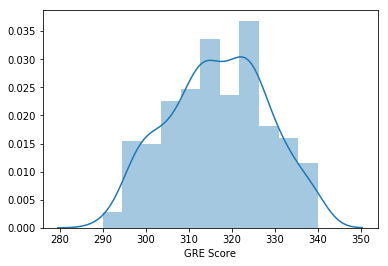

In [15]:
sns.distplot(df['GRE Score'])

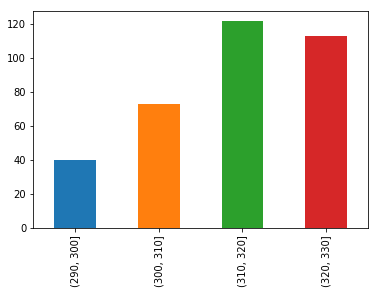

In [16]:
pd.cut(df['GRE Score'],np.arange(290,340,10)).value_counts(sort=False).plot(kind='bar')

In [17]:
df['GRE Score'].mean()

316.8075

In [18]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


c:\users\praneeth_pc\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


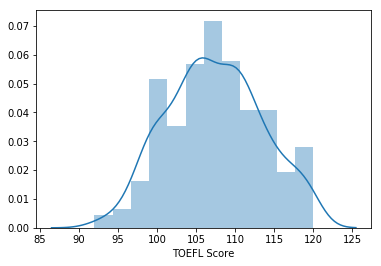

In [19]:
sns.distplot(df['TOEFL Score'])

In [20]:
df['TOEFL Score'].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

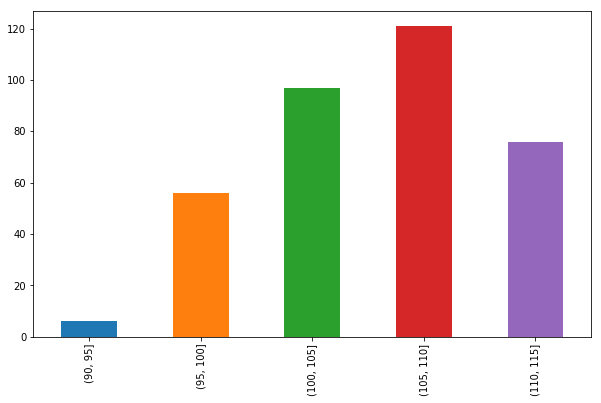

In [21]:
pd.cut(df['TOEFL Score'],np.arange(90,120,5)).value_counts(sort=False).plot('bar',figsize=(10,6))

In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


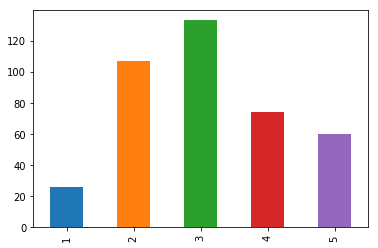

In [24]:
df['University Rating'].value_counts(sort=False).plot('bar')

In [23]:
df['SOP'].dtype

dtype('float64')

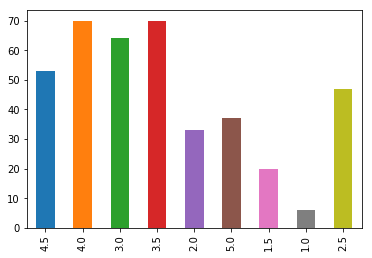

In [25]:
df['SOP'].value_counts(sort=False).plot('bar')

In [26]:
df['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

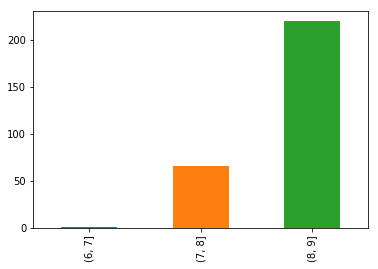

In [27]:
pd.cut(df['CGPA'],np.arange(6,10,1)).value_counts(sort=False).plot('bar')

c:\users\praneeth_pc\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


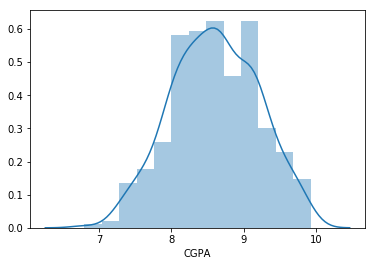

In [28]:
sns.distplot(df['CGPA'])

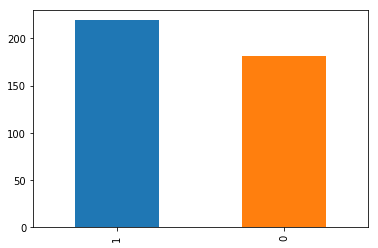

In [29]:
df['Research'].value_counts().plot('bar')

In [30]:
per=df.Research.mean()*100
print('Percentage of experienced is: ',per)

Percentage of experienced is:  54.75


In [31]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [33]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [32]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [36]:
df['LOR '].describe()

count    400.000000
mean       3.452500
std        0.898478
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: LOR , dtype: float64

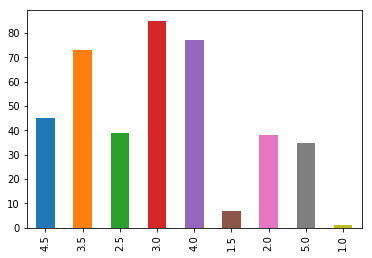

In [35]:
df['LOR '].value_counts(sort=False).plot('bar')

In [40]:
df['Chance of Admit '].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

c:\users\praneeth_pc\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


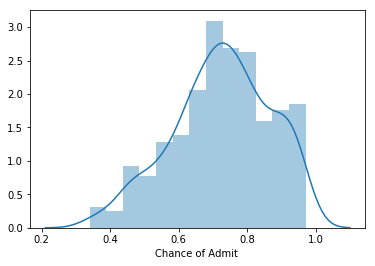

In [37]:
sns.distplot(df['Chance of Admit '])

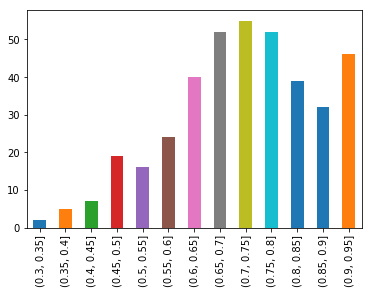

In [38]:
pd.cut(df['Chance of Admit '],np.arange(0.3,1,.05)).value_counts(sort=False).plot('bar')

In [39]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


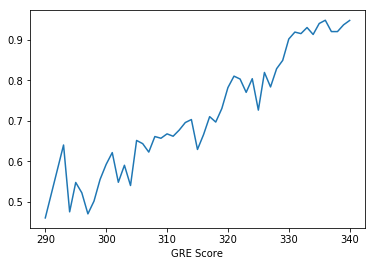

In [44]:
df.groupby('GRE Score')['Chance of Admit '].mean().plot()

In [43]:
df.groupby(['GRE Score','TOEFL Score'])['Chance of Admit '].mean()

GRE Score  TOEFL Score
290        100            0.470000
           104            0.450000
293        97             0.640000
294        93             0.460000
           95             0.490000
295        93             0.460000
           96             0.470000
           99             0.570000
           101            0.690000
296        95             0.440000
           97             0.490000
           99             0.540000
           101            0.600000
297        96             0.385000
           98             0.590000
           100            0.520000
298        92             0.510000
           98             0.390000
           99             0.495000
           101            0.540000
           105            0.690000
299        94             0.420000
           96             0.540000
           97             0.380000
           100            0.633333
           102            0.560000
           106            0.640000
300        97             0.6500

In [42]:
corr= df.corr()
corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


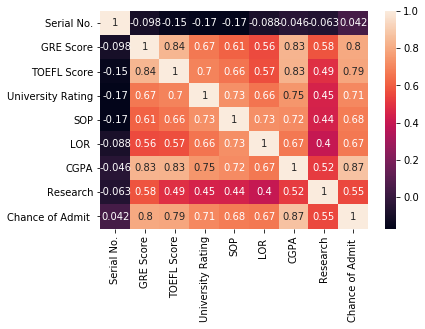

In [45]:
sns.heatmap(corr,annot=True)

In [41]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


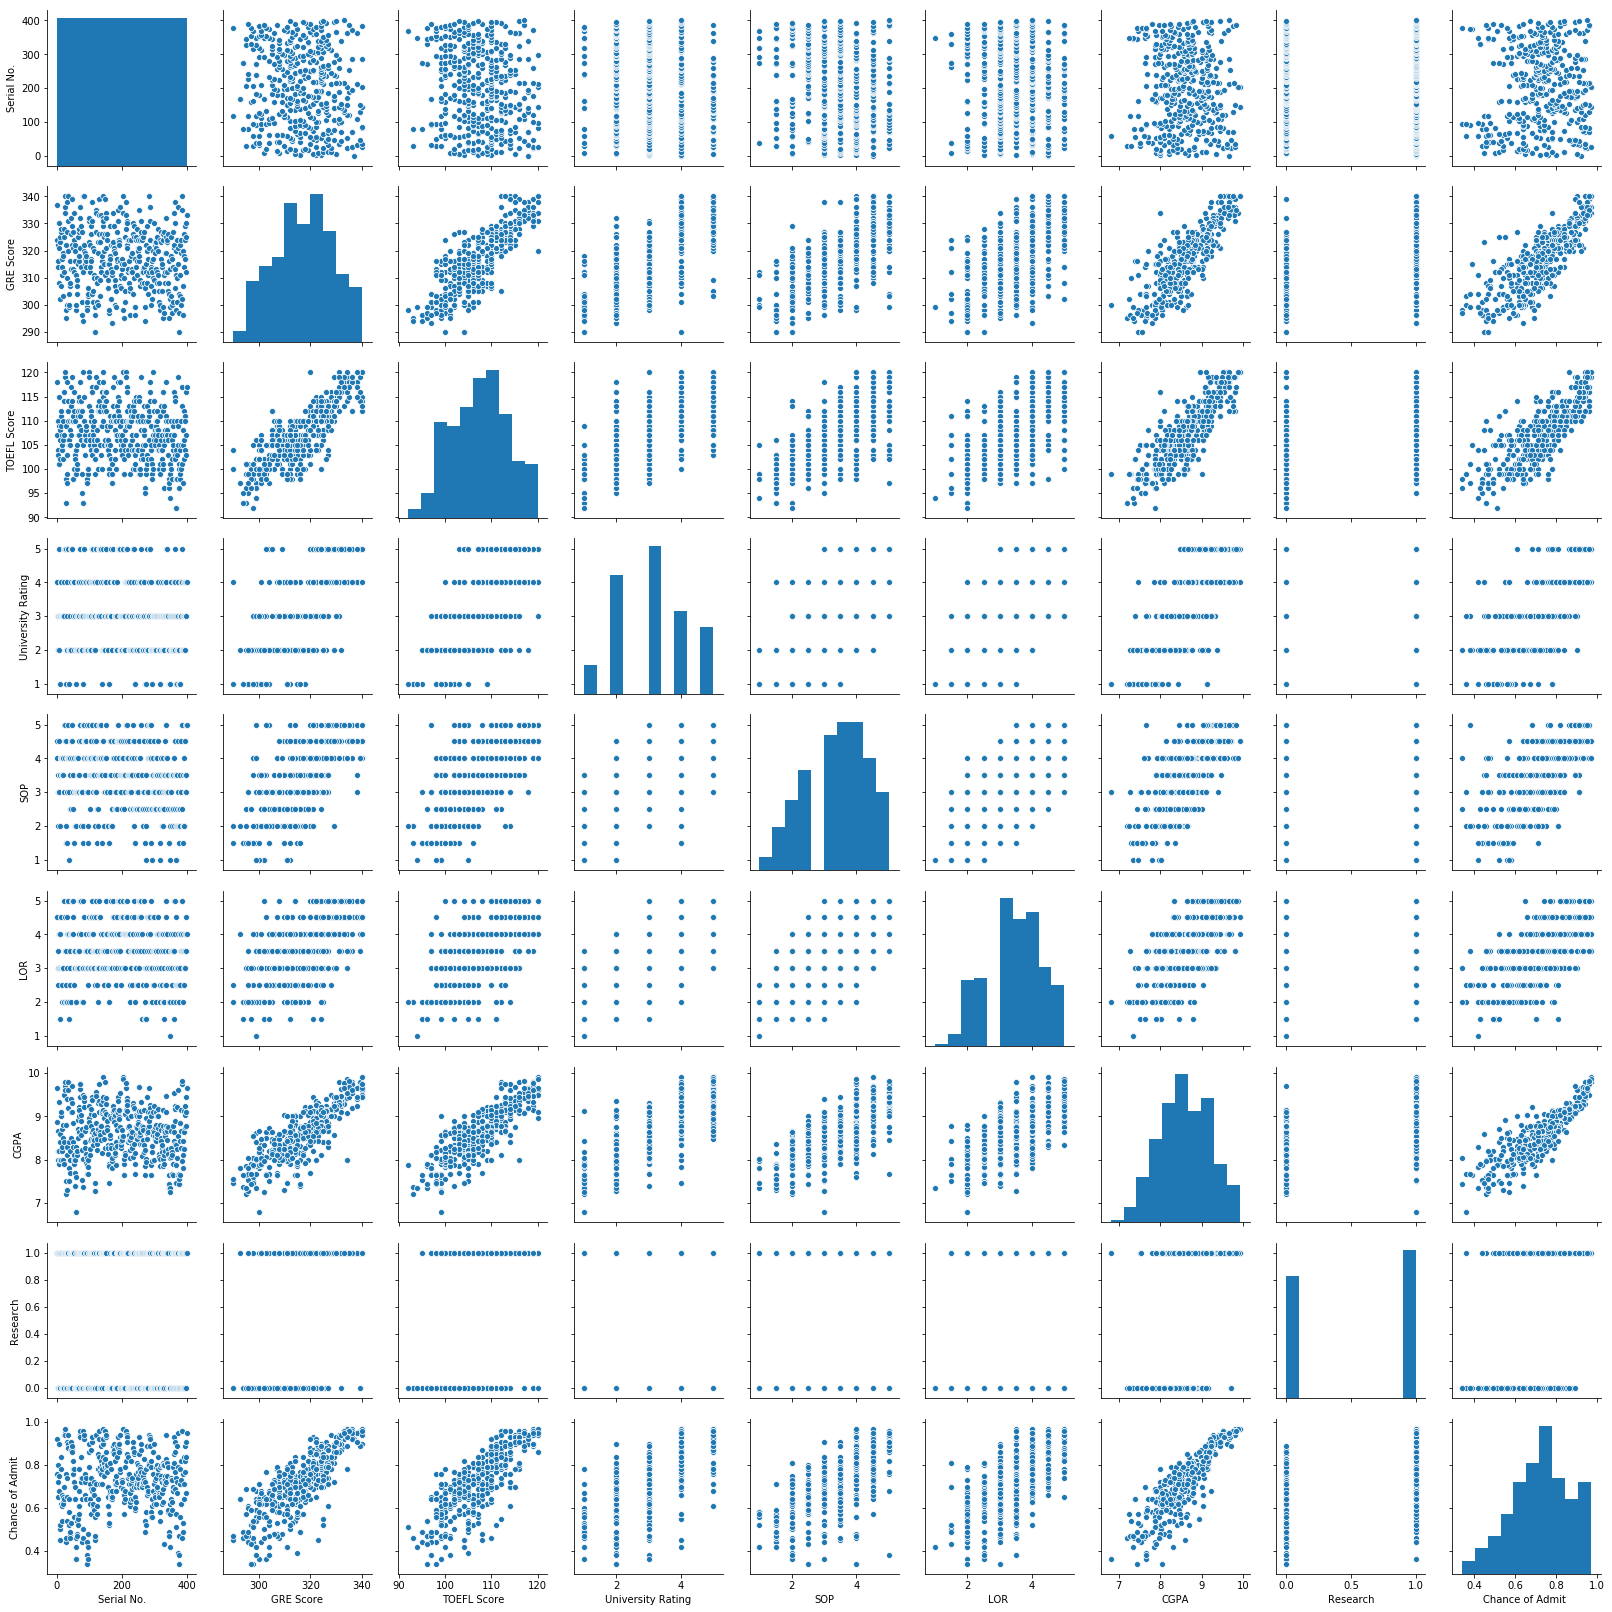

In [46]:
sns.pairplot(df)

In [47]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

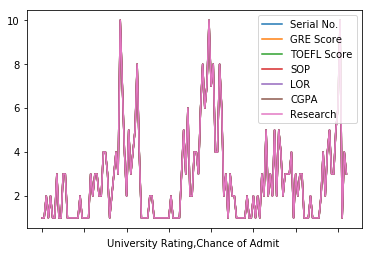

In [48]:
df.groupby(['University Rating','Chance of Admit ']).count().plot()

In [54]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [82]:
X = np.array(df.drop(['Serial No.',"University Rating","Research","Chance of Admit "], 1))
y = np.array(df['Chance of Admit '])

In [83]:
clf = LinearRegression()

In [84]:
X=preprocessing.scale(X)
len(X)

400

In [92]:
X_train,y_train,X_test,y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [86]:
len(y_test)

80

In [89]:
clf.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
clf.score(X_test,y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.71 0.84 0.73 0.82 0.71 0.73 0.8  0.56 0.62 0.94 0.7  0.81 0.61 0.68
 0.78 0.97 0.91 0.71 0.5  0.7  0.6  0.85 0.76 0.78 0.8  0.54 0.85 0.83
 0.57 0.77 0.91 0.96 0.89 0.74 0.78 0.77 0.93 0.8  0.9  0.7  0.73 0.79
 0.86 0.34 0.76 0.64 0.71 0.89 0.73 0.66 0.68 0.93 0.62 0.7  0.91 0.78
 0.49 0.94 0.47 0.68 0.82 0.59 0.72 0.74 0.76 0.69 0.77 0.71 0.77 0.71
 0.59 0.84 0.72 0.82 0.53 0.86 0.46 0.64 0.63 0.45 0.61 0.74 0.79 0.66
 0.94 0.65 0.89 0.65 0.75 0.96 0.9  0.52 0.73 0.57 0.86 0.62 0.96 0.82
 0.64 0.67 0.56 0.83 0.76 0.73 0.72 0.84 0.47 0.75 0.93 0.47 0.64 0.61
 0.69 0.86 0.7  0.62 0.88 0.76 0.58 0.66 0.72 0.65 0.88 0.65 0.71 0.39
 0.81 0.64 0.74 0.44 0.96 0.93 0.53 0.64 0.74 0.79 0.46 0.69 0.79 0.75
 0.68 0.66 0.89 0.61 0.58 0.76 0.77 0.93 0.63 0.84 0.79 0.87 0.93 0.91
 0.84 0.91 0.44 0.47 0.52 0.74 0.52 0.64 0.7  0.74 0.86 0.71 0.64 0.79
 0.89 0.72 0.73 0.64 0.54 0.62 0.71 0.84 0.89 0.84 0.86 0.87 0.5  0.96
 0.92 0.72 0.66 0.79 0.78 0.73 0.58 0.97 0.64 0.94 0.77 0.95 0.92 0.7
 0.71 0.81 0.61 0.78 0.67 0.56 0.73 0.82 0.9  0.69 0.76 0.72 0.9  0.68
 0.81 0.62 0.56 0.81 0.78 0.94 0.9  0.94 0.72 0.36 0.52 0.7  0.73 0.75
 0.93 0.94 0.54 0.45 0.67 0.78 0.77 0.62 0.89 0.64 0.46 0.76 0.82 0.74
 0.94 0.71 0.66 0.36 0.94 0.92 0.9  0.68 0.7  0.87 0.86 0.97 0.76 0.95
 0.65 0.81 0.62 0.8  0.62 0.77 0.48 0.47 0.72 0.88 0.63 0.84 0.67 0.38
 0.85 0.91 0.94 0.85 0.42 0.57 0.72 0.7  0.54 0.72 0.8  0.78 0.64 0.67
 0.66 0.57 0.85 0.78 0.58 0.76 0.53 0.49 0.7  0.88 0.59 0.34 0.74 0.87
 0.8  0.8  0.51 0.64 0.79 0.58 0.46 0.95 0.38 0.75 0.69 0.68 0.84 0.85
 0.65 0.68 0.42 0.61 0.57 0.43 0.63 0.8  0.72 0.75 0.82 0.97].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.